In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Datasets/DS_project_dataset/travel_insuance_data.zip

Archive:  /content/drive/MyDrive/Datasets/DS_project_dataset/travel_insuance_data.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

import warnings
warnings.filterwarnings('ignore')

## Upload the dataset

In [4]:
train_data = pd.read_csv('/content/train.csv')

In [5]:
train_data.shape

(52310, 11)

In [6]:
train_data.isna().sum()
# we observe that there are no null values in the train dataset as such

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

## check the statistics

In [7]:
# we'll now see the various statistics related to the dataset
train_data.describe(include='all')

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310,52310,52310,52310,52310.000000,52310,52310.000000,52310.000000,52310.000000,52310.000000
unique,NaN,16,2,2,25,NaN,97,NaN,NaN,NaN,NaN
top,NaN,EPX,Travel Agency,Online,Cancellation Plan,NaN,SINGAPORE,NaN,NaN,NaN,NaN
freq,NaN,26218,34996,51419,13254,NaN,14242,NaN,NaN,NaN,NaN
mean,6005.745804,NaN,NaN,NaN,NaN,58.256108,NaN,48.554673,12.219963,39.555725,0.166699
std,2306.450475,NaN,NaN,NaN,NaN,109.138708,NaN,60.198589,22.847645,13.762473,0.372710
min,2000.000000,NaN,NaN,NaN,NaN,-2.000000,NaN,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,NaN,NaN,NaN,NaN,10.000000,NaN,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,NaN,NaN,NaN,NaN,24.000000,NaN,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,NaN,NaN,NaN,NaN,57.000000,NaN,55.000000,13.380000,43.000000,0.000000


In [8]:
# from the description above we see that Duration has negative values also , which are not possible(stay has to be greater
# than 0) , so these records needs to be removed
# also from the description above see that the min value of age is 0 , which is again not possible , we'll have to see the 
# values of other features and decide wether to keep these records

# Data Analysis

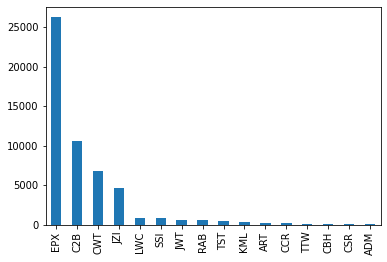

In [9]:
train_data['Agency'].value_counts().plot(kind='bar')

### from the graph above we see that the max booking is done by EPX and far exceeds the booking done by any other agency

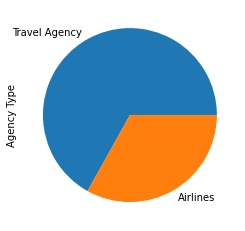

In [10]:
train_data['Agency Type'].value_counts(normalize=True).plot.pie()

### From the plot above we observe , that the majority of booking is done by travel agency and airlines are far behind in selling the travel insurance.
### This may be because , airlines may be less aggressive while selling the travel insurance than the travel agency
### Also, in many countries, insurance is a pre requisite for visa approval.And airlines usually come into picture only when one books a ticket. So , people usually buy insurance first and then book ticket.
### It may also be because of travel agency offering attractive discounts on the package which the Airlines fail to offer.

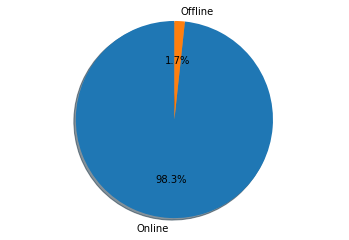

In [11]:
labels = train_data['Distribution Channel'].value_counts().index
sizes = train_data['Distribution Channel'].value_counts(normalize=True).values

fig1 , ax1 = plt.subplots()
ax1.pie(sizes, labels = labels , autopct = '%1.1f%%', shadow = True, startangle= 90)
ax1.axis('equal')
plt.show()

### from the above pie chart we can conclude that almost all the insurance are purchased online , this can be attributed to high internet usage and saves the hassle of visiting the insurer.

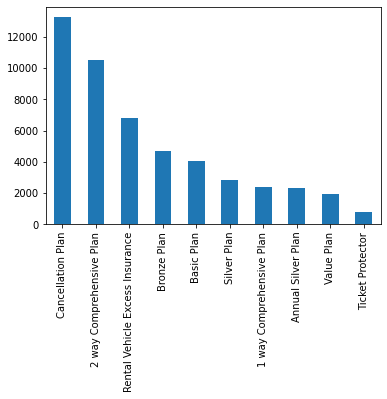

In [12]:
train_data['Product Name'].value_counts().head(10).plot(kind='bar')

### from the chart above , we observe that the most sold plan is the Cancellation plan
### Trip Cancellation is a pre-departure benefit that can reimburse 100% of a traveler's trip cost if they need to cancel their trip for a covered reason. The most common covered reason is unforeseen illness, injury, or death of the traveler, a traveling companion, or a non-traveling family member. May also be because of non-approval of VISA

In [13]:
train_data['Duration'].median()

24.0

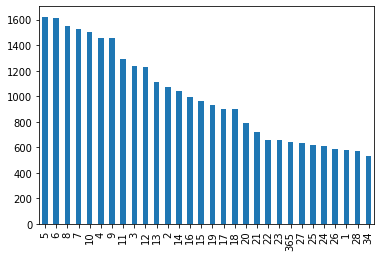

In [14]:
train_data['Duration'].value_counts().head(30).plot(kind='bar')

### from above we observe that the median of the Duration is 24 , but we also observe that number of travellers decreasing with increase in days of stay which is understantable. Also count of travellers is considerable high for a duration of till 15 days , except 1 day for which the count is comparitively low.

In [15]:
train_data['Destination'].value_counts()

SINGAPORE       14242
THAILAND         4562
MALAYSIA         4359
CHINA            3909
AUSTRALIA        3011
                ...  
BERMUDA             2
BELARUS             2
BHUTAN              2
ZAMBIA              1
TURKMENISTAN        1
Name: Destination, Length: 97, dtype: int64

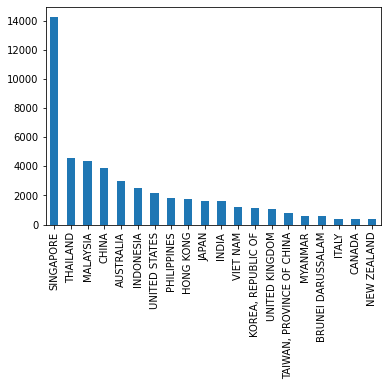

In [16]:
train_data['Destination'].value_counts()[:20].plot(kind='bar')

### from above graph we observe that Singapore is preferred destination and travelers to singapore far exceeds any other country

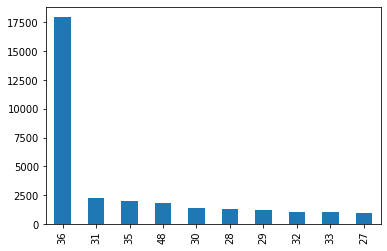

In [17]:
train_data['Age'].value_counts().head(10).plot(kind='bar')

In [18]:
train_data['Age'].median()

36.0

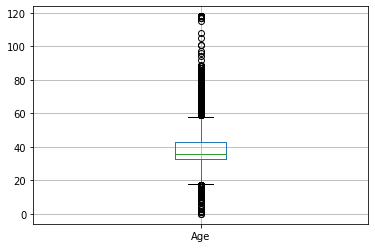

In [19]:
train_data.boxplot(column = ['Age'])

### from the graphs above we observe  that the maximum travellers are of the age 36. Also through the boxplot , we observe a lot of outliers( ages 80 and above and below 20)

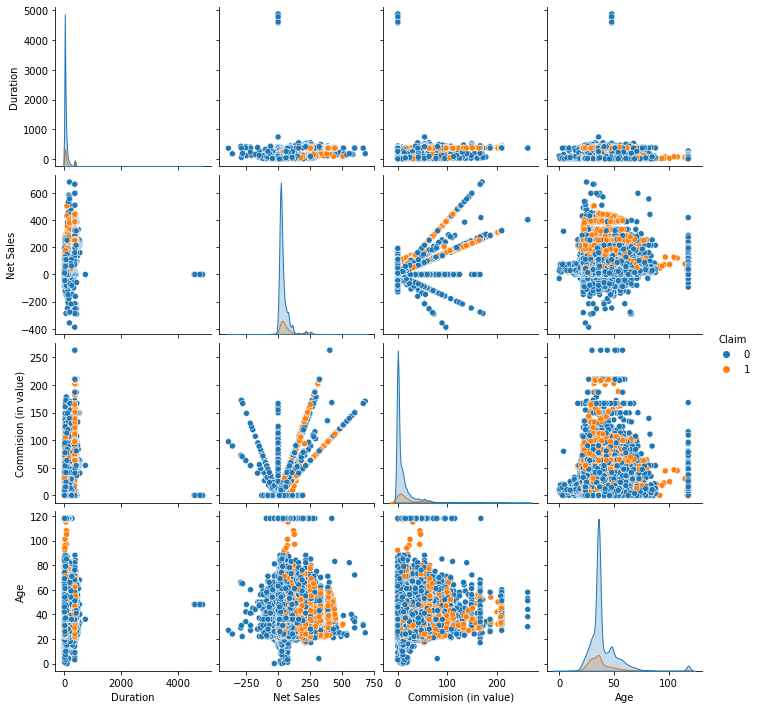

In [20]:
#checking the relationship through the pair plot
sns.pairplot(data=train_data.drop('ID', axis=1) , hue='Claim')

### we do not see a strong relationships among the variables

In [21]:
train_data.groupby(['Agency Type','Distribution Channel']).describe()

ID               ... Claim     
                                      count         mean  ...   75%  max
Agency Type   Distribution Channel                        ...           
Airlines      Offline                  15.0  5251.333333  ...   0.0  0.0
              Online                17299.0  5986.282213  ...   1.0  1.0
Travel Agency Offline                 876.0  6057.042237  ...   0.0  1.0
              Online                34120.0  6014.628605  ...   0.0  1.0

[4 rows x 48 columns]

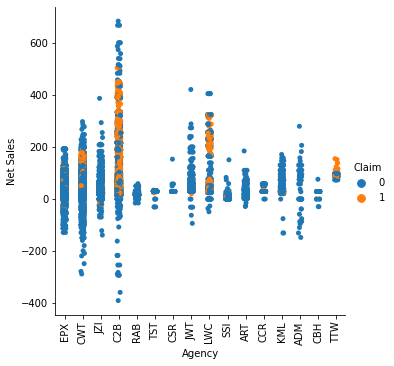

In [22]:
chart = sns.catplot(x='Agency', y='Net Sales',hue='Claim', data = train_data)
chart.set_xticklabels(rotation = 90)

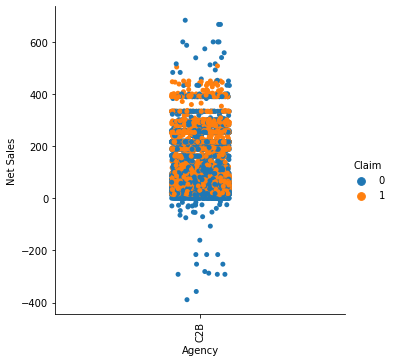

In [23]:
chart = sns.catplot(x='Agency', y='Net Sales',hue='Claim', data = train_data[train_data['Agency']=='C2B'])
chart.set_xticklabels(rotation = 90)

### from the above chart we see that the majority of claims are made only for insurance taken from certain agencies and for others the claims are very small.

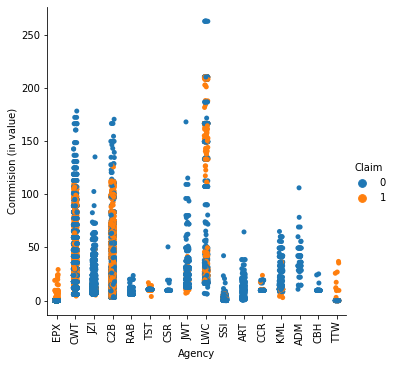

In [24]:
chart = sns.catplot(x='Agency', y='Commision (in value)',hue='Claim', data = train_data)
chart.set_xticklabels(rotation = 90)

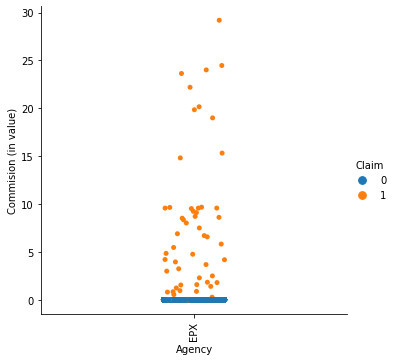

In [25]:
chart = sns.catplot(x='Agency', y='Commision (in value)',hue='Claim', data = train_data[train_data['Agency']=='EPX'])
chart.set_xticklabels(rotation = 90)

### from the above chart we observe that the Commission for EPX agency is very less compared to other agencies and comparitively claims are also more. More investigation needs to be done for identifying the root cause.

### also for the EPX case, claims are negligible for the policies for which commission is 0 while more claims for policies having high commission. Not a single no-claim policy when commission is more than zero.

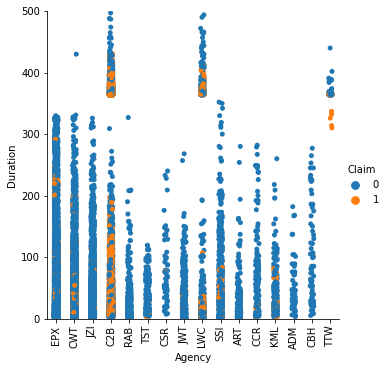

In [26]:
chart = sns.catplot(x='Agency', y='Duration',hue='Claim', data = train_data)
axes = chart.axes
axes[0,0].set_ylim(0,500)
chart.set_xticklabels(rotation = 90)

<Figure size 1440x864 with 0 Axes>

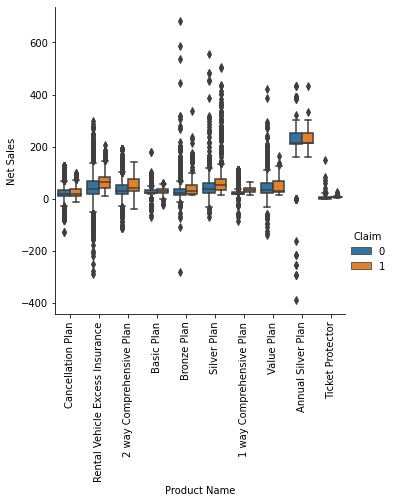

In [27]:
top_10_products = train_data['Product Name'].value_counts().head(10).index

top_10_p = train_data[train_data['Product Name'].isin(list(top_10_products))]
plt.figure(figsize=(20,12))
chart = sns.catplot(x = 'Product Name', y = 'Net Sales', hue= 'Claim' , kind='box', data = top_10_p)
chart.set_xticklabels(rotation = 90)

### one observation from the above chart is , all the policies having claims as 1 have net sales of more than 0 , while no claim(0) policies have net sales of less than 0 also.

<Figure size 1440x864 with 0 Axes>

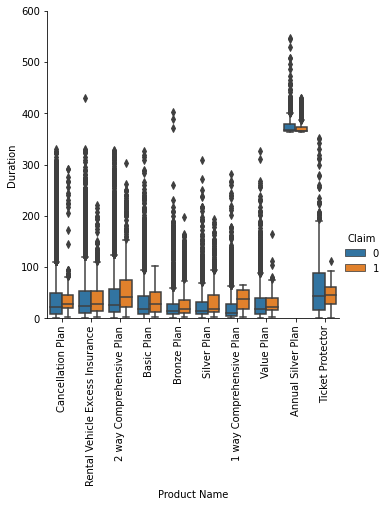

In [28]:
plt.figure(figsize=(20,12))
chart = sns.catplot(x = 'Product Name', y = 'Duration', hue= 'Claim' , kind='box', data = top_10_p)
axes_1 = chart.axes
axes_1[0,0].set_ylim(0,600)
chart.set_xticklabels(rotation = 90)

### no major difference observed in the duration of stay of top 10 products for Claims and Non-Claims

<Figure size 1440x864 with 0 Axes>

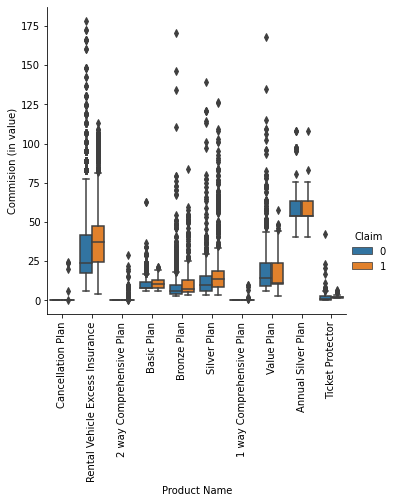

In [29]:
plt.figure(figsize=(20,12))
chart = sns.catplot(x = 'Product Name', y = 'Commision (in value)', hue= 'Claim' , kind='box', data = top_10_p)
chart.set_xticklabels(rotation = 90)

### no major difference observed in commissions of top 10 products based on commission for Claim and No-Claim

<Figure size 1440x864 with 0 Axes>

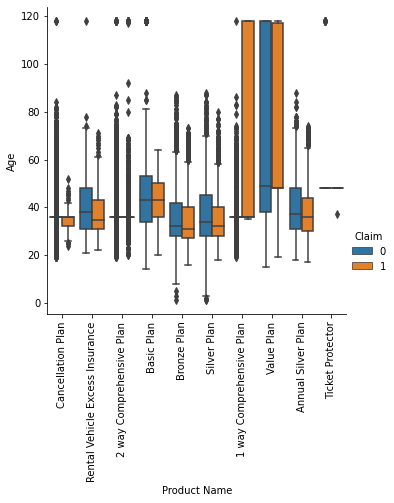

In [30]:
plt.figure(figsize=(20,12))
chart = sns.catplot(x = 'Product Name', y = 'Age', hue= 'Claim' , kind='box', data = top_10_p)
chart.set_xticklabels(rotation = 90)

In [31]:
# top 10 products claim ratio

columns = ['Product_Name','claim_ratio']
prod_claim_ratio_df = pd.DataFrame(columns= columns)

for prod in list(top_10_products):
  top_prod = top_10_p[top_10_p['Product Name'] == prod]
  # print(top_prod)
  
  claim_ratio = top_prod['Claim'].value_counts().loc[1] / (top_prod['Claim'].value_counts().loc[1] + top_prod['Claim'].value_counts().loc[0])
  claim_dic = {"Product_Name": prod , "claim_ratio":claim_ratio}
  prod_claim_ratio_df.loc[len(prod_claim_ratio_df)] =  claim_dic
  
prod_claim_ratio_df

,Product_Name,claim_ratio
0,Cancellation Plan,0.026784
1,2 way Comprehensive Plan,0.138039
2,Rental Vehicle Excess Insurance,0.124468
3,Bronze Plan,0.427694
4,Basic Plan,0.060861
5,Silver Plan,0.483578
6,1 way Comprehensive Plan,0.028227
7,Annual Silver Plan,0.617973
8,Value Plan,0.047935
9,Ticket Protector,0.073077


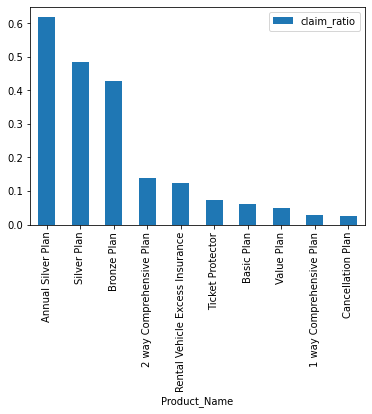

In [32]:
#plotting the top 10 products in terms of claim
prod_claim_ratio_df.sort_values(by='claim_ratio', ascending=False).plot.bar(x='Product_Name',y='claim_ratio')

### from the above we observe that the Age bracket for Cancellation plan and 1 for Claim is pretty narrow and lies between 20 to 40 yrs . While for other plans the age bracket is very spread out
#### one can conclude , annyone taking a cancellation plan and lying in the age bracket 20-40 has a higher probability of claiming the policy insurance.

### Also from the claim ratio of the various top selling plans , we observe that there is higher probability of claims of someone buying an Annual Silver Plan than the Cancellation Plan

<Figure size 1440x864 with 0 Axes>

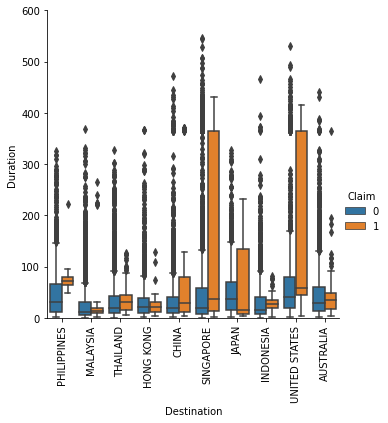

In [33]:
top_10_destinations = train_data['Destination'].value_counts().head(10).index

top_10_d = train_data[train_data['Destination'].isin(list(top_10_destinations))]

plt.figure(figsize=(20,12))
chart = sns.catplot(x = 'Destination', y = 'Duration', hue= 'Claim' , kind='box', data = top_10_d)
axes_2 = chart.axes
axes_2[0,0].set_ylim(0,600)
chart.set_xticklabels(rotation = 90)

### from above we observe that the majority of the claims are from Singapore ,US and Japan. This is primarily because the majority of travelers are headed to Singapore and other east asian destinations.

### but this is different in case of US and Japan where travelers are less than the other east asian nations but still the Claim percentage is higher than many asian nations. This may be because of people buying policies for US Visa process and Visa getting rejected by the administration. So people claiming the policy for calcellation of travel.

### we'll have to check further for the type of policy bought for US and Japan and see the trend



<Figure size 1440x864 with 0 Axes>

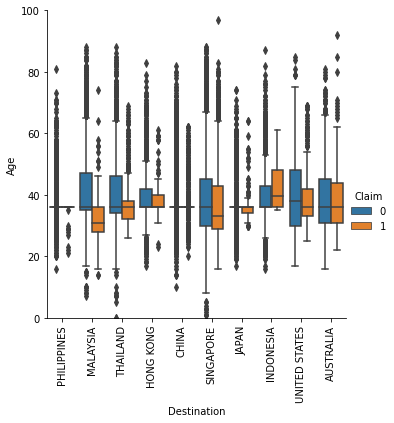

In [34]:
plt.figure(figsize=(20,12))
chart = sns.catplot(x = 'Destination', y = 'Age', hue= 'Claim' , kind='box', data = top_10_d)
axes_2 = chart.axes
axes_2[0,0].set_ylim(0,100)
chart.set_xticklabels(rotation = 90)

In [35]:
# we'll now try to derive the ratio of claims for each of the top destinations
# 
columns = ['Destination','claim_ratio']
des_claim_ratio_df = pd.DataFrame(columns= columns)

for dest in list(top_10_destinations):
  top_dest = top_10_d[top_10_d['Destination'] == dest]
  claim_ratio = top_dest['Claim'].value_counts()[1] / (top_dest['Claim'].value_counts()[1] + top_dest['Claim'].value_counts()[0])
  claim_dic = {"Destination": dest , "claim_ratio":claim_ratio}
  des_claim_ratio_df.loc[len(des_claim_ratio_df)] =  claim_dic
  
des_claim_ratio_df

,Destination,claim_ratio
0,SINGAPORE,0.372560
1,THAILAND,0.100395
2,MALAYSIA,0.036935
3,CHINA,0.164236
4,AUSTRALIA,0.151113
5,INDONESIA,0.038951
6,UNITED STATES,0.202186
7,PHILIPPINES,0.047301
8,HONG KONG,0.064225
9,JAPAN,0.086903


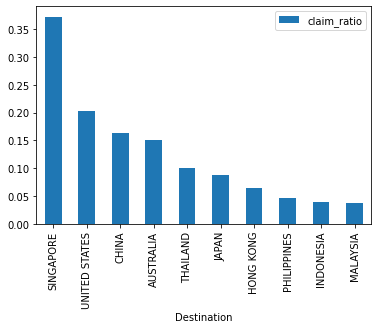

In [36]:
# plotting the claim ratio
des_claim_ratio_df = des_claim_ratio_df.sort_values('claim_ratio', ascending=False)
des_claim_ratio_df.plot.bar(x = 'Destination',y='claim_ratio', stacked=True)

### from the bar graph above , we observe that there is higher probability of claims if the travel destination is Singapore and Unites States than the probability of claims for other countries

In [37]:
## now we'll try to identify the products for these top destinations for which the claim ratio is higher

des_claim_ratio_df['Destination'].to_list()

['SINGAPORE',
 'UNITED STATES',
 'CHINA',
 'AUSTRALIA',
 'THAILAND',
 'JAPAN',
 'HONG KONG',
 'PHILIPPINES',
 'INDONESIA',
 'MALAYSIA']

In [38]:
columns = ['Destination','Product_Name','claim_ratio']
top_prod_claim_ratio_df = pd.DataFrame(columns= columns)

for col in des_claim_ratio_df['Destination'].to_list():
  if col not in top_prod_claim_ratio_df['Destination'].values:
    train_data_col = train_data[train_data['Destination'] == col]
    top_product = train_data_col['Product Name'].value_counts().head(5).index
    top_product_dest = train_data_col[train_data_col['Product Name'].isin(list(top_product))]

    for prod in list(top_product):
      top_prod = top_product_dest[top_product_dest['Product Name'] == prod]

      try:
        claim_yes = top_prod['Claim'].value_counts().loc[1]
      except:
        claim_yes = 0

      try:
        claim_no = top_prod['Claim'].value_counts().loc[0]
      except:
        claim_no = 0

      claim_ratio = claim_yes / (claim_yes + claim_no)

      claim_dic = {"Destination":col, "Product_Name": prod , "claim_ratio":claim_ratio}
      top_prod_claim_ratio_df.loc[len(top_prod_claim_ratio_df)] =  claim_dic
top_prod_claim_ratio_df


,Destination,Product_Name,claim_ratio
0,SINGAPORE,Bronze Plan,0.427694
1,SINGAPORE,Silver Plan,0.483578
2,SINGAPORE,Annual Silver Plan,0.617973
3,SINGAPORE,Cancellation Plan,0.013333
4,SINGAPORE,Ticket Protector,0.073077
5,UNITED STATES,Cancellation Plan,0.054305
6,UNITED STATES,2 way Comprehensive Plan,0.386606
7,UNITED STATES,Rental Vehicle Excess Insurance,0.000000
8,UNITED STATES,Annual Travel Protect Gold,0.709877
9,UNITED STATES,1 way Comprehensive Plan,0.107692


<Figure size 432x288 with 0 Axes>

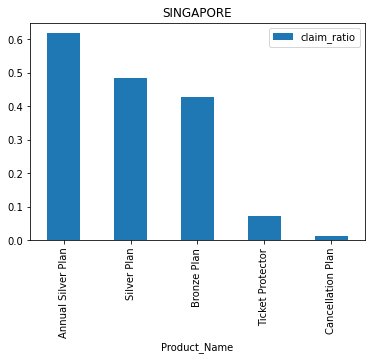

<Figure size 432x288 with 0 Axes>

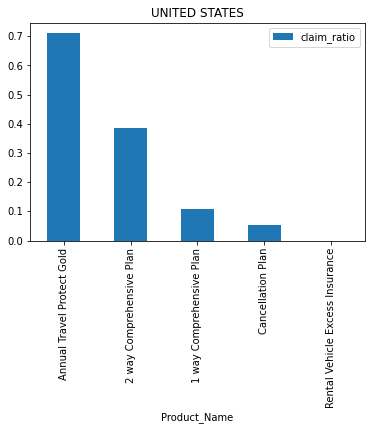

<Figure size 432x288 with 0 Axes>

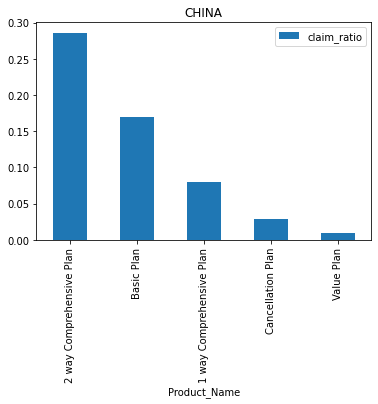

<Figure size 432x288 with 0 Axes>

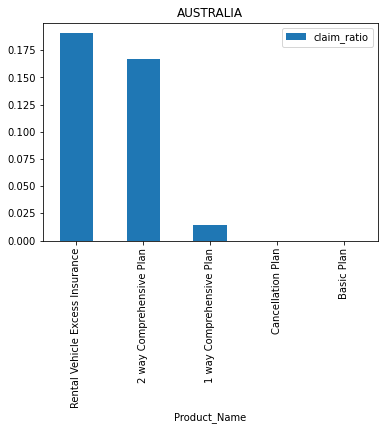

<Figure size 432x288 with 0 Axes>

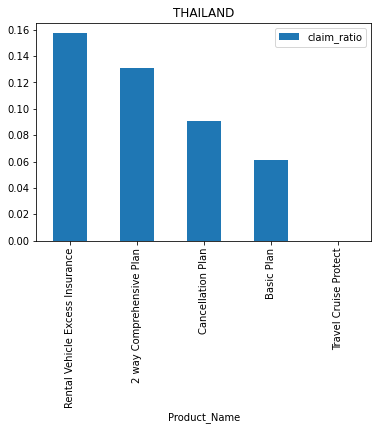

<Figure size 432x288 with 0 Axes>

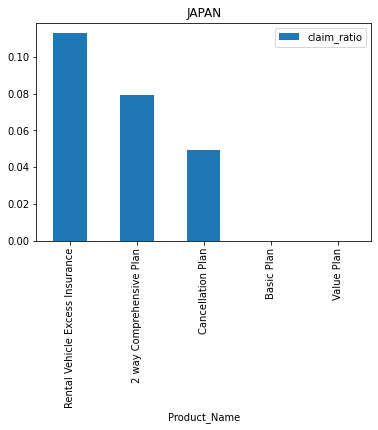

<Figure size 432x288 with 0 Axes>

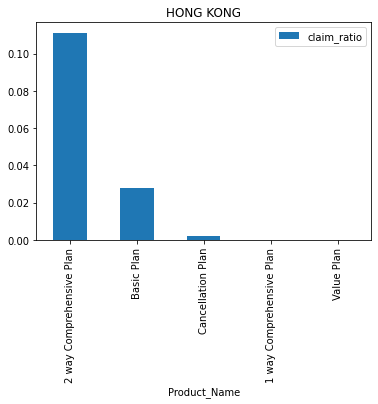

<Figure size 432x288 with 0 Axes>

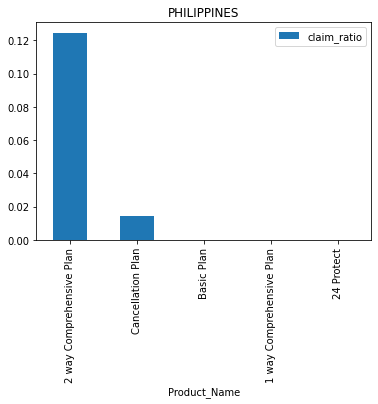

<Figure size 432x288 with 0 Axes>

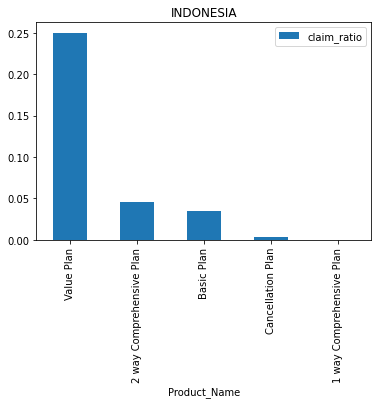

<Figure size 432x288 with 0 Axes>

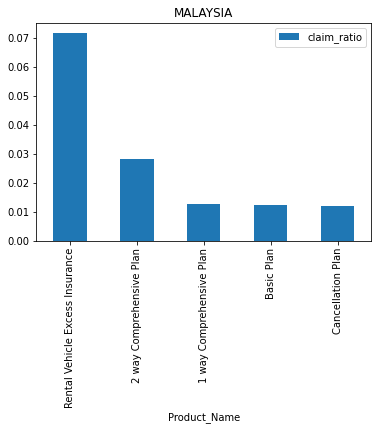

In [39]:
## plotting the above destination wise product dataframe
unique_dest = top_prod_claim_ratio_df['Destination'].unique()

top_prod_claim_ratio_df.groupby(['Destination','Product_Name']).describe()

for col in list(unique_dest):
  if col not in top_prod_claim_ratio_df['Destination']:
    plt.figure()
    df = top_prod_claim_ratio_df[top_prod_claim_ratio_df['Destination'] == col]
    des_claim_ratio_df_final = df.sort_values('claim_ratio', ascending=False)
    des_claim_ratio_df_final.plot.bar(x = 'Product_Name',y='claim_ratio', stacked=True)
    plt.title(col)
    plt.show()

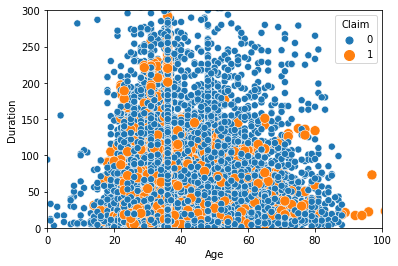

In [40]:
# we'll try to find a relationship between age and duration and its impact on claims
ax = sns.scatterplot(y='Duration',x='Age',hue='Claim', size ='Claim',sizes = (100,50), data = train_data)
ax.set_xlim(0,100)
ax.set_ylim(0,300)
plt.show()

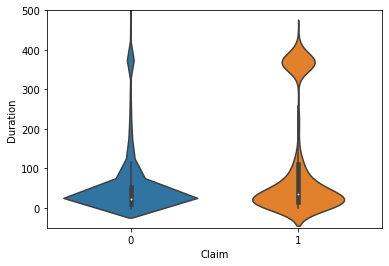

In [41]:
ax_1 = sns.violinplot(y='Duration', x= 'Claim', data = train_data)
ax_1.set_ylim(-50,500)
plt.show()

### from the bar graph above we observe that the average duration for no-claim is less than the average duration for claim

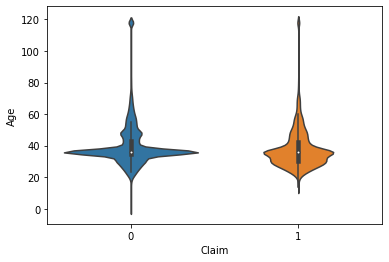

In [42]:
  sns.violinplot(x='Claim', y='Age', data=train_data)

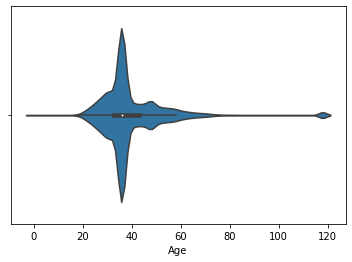

In [43]:
sns.violinplot(x=train_data['Age'])

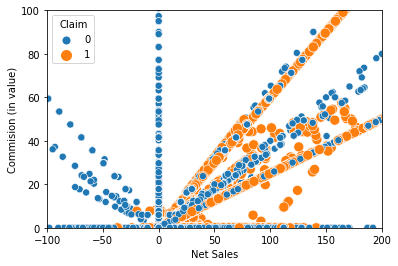

In [44]:
ax = sns.scatterplot(y='Commision (in value)',x='Net Sales',hue='Claim', size ='Claim',sizes = (100,50), data = train_data)
ax.set_xlim(-100,200)
ax.set_ylim(0,100)
plt.show()

Text(0.5, 1.0, 'Claim Distribution')

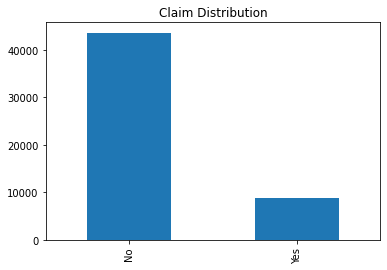

In [45]:
plt.figure()
train_data['Claim'].value_counts().plot(kind='bar')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.title('Claim Distribution')

### from the above chart we can clearly decipher that as the net sales increases commission also increases. And claims are only made for the policies which have positive net sales value.

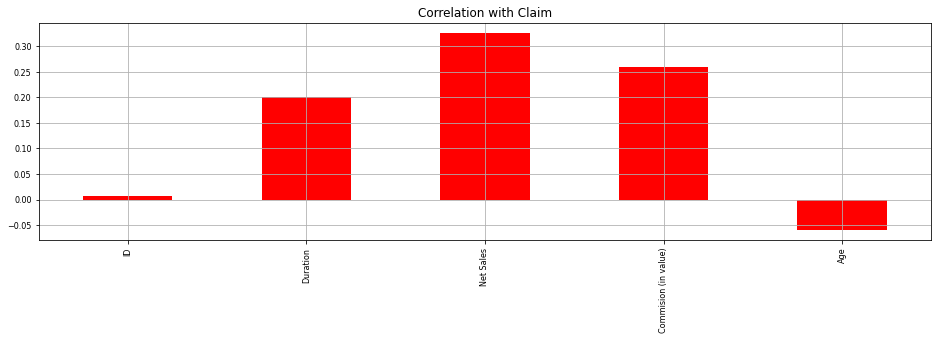

In [46]:
train_data.drop(columns=['Claim'], axis=1).corrwith(train_data.Claim).plot.bar(
    figsize=(16,4),title = 'Correlation with Claim', fontsize=8, rot=90 , grid=True , color = 'red'
)

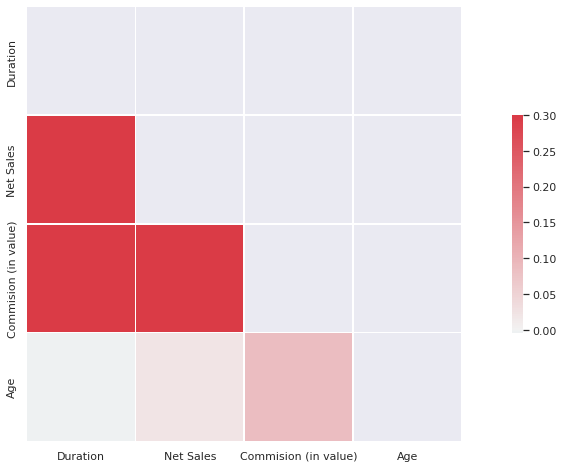

In [47]:
sns.set(style='dark')

correlation = train_data.drop(columns = ['ID','Claim']).corr()

mask = np.zeros_like(correlation , dtype = np.bool)

mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 8))


cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

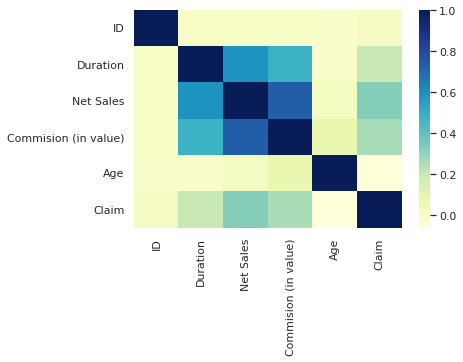

In [48]:
# we'll check for correlation between the features and labels
sns.heatmap(train_data.corr(),cmap='YlGnBu')

# building the model

In [49]:
!pip install mlxtend

In [50]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , roc_auc_score , roc_curve, classification_report,confusion_matrix , precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from xgboost import XGBClassifier

import six
import sys
sys.modules['sklearn.externals.six'] = six

from mlxtend.classifier import StackingClassifier

In [51]:
train_data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [52]:
# checking for null values in the dataset
train_data.isna().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

In [53]:
train_data.shape

(52310, 11)

In [54]:
#from the destination plot , we had observed that majority of travel happens to to 32 locations/countries , while for others the frequency is not so much.
# So , in order to simplify the dataset , we would filter the top 32 destinations and train the model on them.

top_destinations = list(train_data['Destination'].value_counts()[:32].index)

train_df = train_data.loc[train_data['Destination'].isin(top_destinations)]
train_df.shape

(50808, 11)

In [55]:
train_data['Claim'].value_counts(normalize=True)

0    0.833301
1    0.166699
Name: Claim, dtype: float64

## splitting the dataset into train and test set

In [56]:
#splitting the train data into features and labels
X = train_df.drop(columns=['ID','Claim'],axis=1)
y = train_df['Claim']

In [57]:
X

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.000000,0.0000,41
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.000000,0.0000,35
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.800000,11.8800,47
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.000000,0.0000,48
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.000000,0.0000,36
...,...,...,...,...,...,...,...,...,...
52305,C2B,Airlines,Online,Annual Gold Plan,365,SINGAPORE,444.750593,111.1858,40
52306,RAB,Airlines,Online,Value Plan,8,BRUNEI DARUSSALAM,23.000000,9.2000,54
52307,C2B,Airlines,Online,Bronze Plan,38,SINGAPORE,61.100000,15.2800,37
52308,EPX,Travel Agency,Online,Cancellation Plan,2,THAILAND,10.000000,0.0000,46


In [58]:
X = pd.get_dummies(data = X , columns = ['Agency','Agency Type','Distribution Channel','Product Name','Destination'], drop_first= True)

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X , y , random_state = 0, test_size = 0.3 , stratify = y)

In [60]:
print(X_train.shape, X_val.shape , y_train.shape , y_val.shape)

(35565, 76) (15243, 76) (35565,) (15243,)


### Scaling the dataset

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)

X_val_scaled = sc.transform(X_val)

In [63]:
X_train_scaled , X_val_scaled

(array([[-0.1103257 , -0.45399824, -0.53366733, ..., -0.14486285,
         -0.21224005, -0.15741757],
        [-0.35163331, -0.47058277, -0.53366733, ..., -0.14486285,
         -0.21224005, -0.15741757],
        [-0.4410065 , -0.80227342,  1.29197048, ..., -0.14486285,
         -0.21224005, -0.15741757],
        ...,
        [ 2.74067912,  2.31313102,  1.52818817, ..., -0.14486285,
         -0.21224005, -0.15741757],
        [ 0.45272541,  0.49132012, -0.53366733, ..., -0.14486285,
         -0.21224005, -0.15741757],
        [-0.2533228 ,  0.19279853, -0.53366733, ..., -0.14486285,
         -0.21224005, -0.15741757]]),
 array([[-0.44994382, -0.02401761, -0.53366733, ..., -0.14486285,
         -0.21224005, -0.15741757],
        [-0.4410065 , -0.63642809, -0.53366733, ..., -0.14486285,
         -0.21224005, -0.15741757],
        [-0.52144238,  0.74008811,  1.09965943, ..., -0.14486285,
         -0.21224005, -0.15741757],
        ...,
        [-0.39631991, -0.37107557, -0.53366733, ..., -

## Identifying the best algorithms 

In [65]:
def model_ranking(x_train, x_test,y_train, y_test):
    # model_score = {}
    
    final_results = pd.DataFrame(columns = ['Model', 'Accuracy','Precision', 'Recall','F1 Score'])
   

   #Logistic Regression
    print('training LR')
    t0 = time.time()
    lr_clf = LogisticRegression(random_state=0).fit(x_train, y_train)
    t1 = time.time()
    lr_pred = lr_clf.predict(x_test)
    lr_accuracy = accuracy_score(y_test, lr_pred)
    lr_precision = precision_score(y_test , lr_pred)
    lr_recall = recall_score(y_test , lr_pred)
    lr_f_score = f1_score(y_test , lr_pred)
    
    model_score = {"Model":"Logistic Regression","Accuracy":lr_accuracy, "Precision": lr_precision, "Recall": lr_recall,
                   "F1 Score": lr_f_score,"Training Time": t1 - t0}
    final_results = final_results.append(model_score, ignore_index = True)

    #SVM - rbf
    print('training SVM')
    t0 = time.time()
    svc_clf = svm.SVC(kernel='rbf', random_state=0).fit(x_train, y_train)
    svc_pred = svc_clf.predict(x_test)
    t1 = time.time()
    svm_accuracy = accuracy_score(y_test, svc_pred)
    svm_precision = precision_score(y_test , svc_pred)
    svm_recall = recall_score(y_test , svc_pred)
    svm_f_score = f1_score(y_test , svc_pred)

    model_score = {"Model":"SVM(RBF)","Accuracy":svm_accuracy, "Precision": svm_precision, "Recall": svm_recall, "F1 Score": svm_f_score,"Training Time": t1 - t0}
    final_results = final_results.append(model_score, ignore_index = True)
    # print(final_results)
         

    # # Decision Tree 
    print('training Decision Tree')
    t0 = time.time()
    dt_clf = DecisionTreeClassifier(random_state = 0).fit(x_train, y_train)
    dt_pred = dt_clf.predict(x_test)
    t1 = time.time()
    dt_accuracy = accuracy_score(y_test, dt_pred)
    dt_precision = precision_score(y_test, dt_pred)
    dt_recall = recall_score(y_test, dt_pred)
    dt_f_score = f1_score(y_test , dt_pred)

    model_score = {"Model":"Decision Tree", "Accuracy": dt_accuracy, "Precision": dt_precision, "Recall": dt_recall, "F1 Score": dt_f_score,"Training Time": t1-t0}
    final_results = final_results.append(model_score, ignore_index = True)
    # print(final_results)


    # #knn
    print('training KNN')
    t0 = time.time()
    knn_clf = KNeighborsClassifier().fit(x_train, y_train)
    knn_pred = knn_clf.predict(x_test)
    t1 = time.time()
    knn_accuracy = accuracy_score(y_test, knn_pred)
    knn_precision = precision_score(y_test, knn_pred)
    knn_recall = recall_score(y_test, knn_pred)
    knn_f_score = f1_score(y_test, knn_pred)

    model_score = {"Model":"K Nearest Neighbours", "Accuracy": knn_accuracy, "Precision": knn_precision, "Recall": knn_recall, 
                   "F1 Score": knn_f_score, "Training Time": t1-t0}
    final_results = final_results.append(model_score, ignore_index = True)
    # print(final_results)


    # #Naive Bayes
    print('training Naive Bayes')
    t0 = time.time()
    nb_clf = GaussianNB().fit(x_train, y_train)
    nb_pred = nb_clf.predict(x_test)
    t1 = time.time()
    nb_accuracy = accuracy_score(y_test, nb_pred)
    nb_precision = precision_score(y_test, nb_pred)
    nb_recall = recall_score(y_test, nb_pred)
    nb_f_score = f1_score(y_test, nb_pred)

    model_score = {"Model":"Naive Bayes", "Accuracy": nb_accuracy, "Precision": nb_precision, "Recall": nb_recall,
                   "F1 Score": nb_f_score, "Training Time": t1-t0}
    final_results = final_results.append(model_score, ignore_index = True)
    # print(final_results)


    # #random forest - gini
    print('training Random Forest')
    t0 = time.time()
    rf_clf = RandomForestClassifier(criterion = 'gini',random_state=0).fit(x_train, y_train)
    rf_pred = rf_clf.predict(x_test)
    t1 = time.time()
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_precision = precision_score(y_test, rf_pred)
    rf_recall = recall_score(y_test, rf_pred)
    rf_f_score = f1_score(y_test, rf_pred)

    model_score = {"Model":"Random Forest(Gini)", "Accuracy": rf_accuracy, "Precision": rf_precision, "Recall": rf_recall,
                   "F1 Score": rf_f_score, "Training Time": t1-t0}
    final_results = final_results.append(model_score, ignore_index= True)
    # print(final_results)

    
    # #random forest - entropy
    print('training Random Forest')
    t0 = time.time()
    rf_clf = RandomForestClassifier(criterion = 'entropy',random_state=0).fit(x_train, y_train)
    rf_pred = rf_clf.predict(x_test)
    t1 = time.time()
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_precision = precision_score(y_test, rf_pred)
    rf_recall = recall_score(y_test, rf_pred)
    rf_f_score = f1_score(y_test, rf_pred)

    model_score = {"Model":"Random Forest(Entropy)", "Accuracy": rf_accuracy, "Precision": rf_precision, "Recall": rf_recall,
                   "F1 Score": rf_f_score, "Training Time": t1-t0}
    final_results = final_results.append(model_score, ignore_index= True)
    # print(final_results)

    
    # #xgboost
    print('training XG Boost')
    t0 = time.time()
    xgb_clf = XGBClassifier(random_state=0).fit(x_train, y_train)
    xgb_pred = xgb_clf.predict(x_test)
    t1 = time.time()
    xgb_accuracy = accuracy_score(y_test, xgb_pred)
    xgb_precision = precision_score(y_test, xgb_pred)
    xgb_recall = recall_score(y_test, xgb_pred)
    xgb_f_score = f1_score(y_test, xgb_pred)

    model_score = {"Model":"XG Boost", "Accuracy": xgb_accuracy, "Precision": xgb_precision, "Recall": xgb_recall,
                   "F1 Score": xgb_f_score, "Training Time": t1-t0}
    final_results = final_results.append(model_score, ignore_index= True)
    # print(final_results)


    # # gradient boosting
    print('training Gradient Boosting')
    gb_clf = GradientBoostingClassifier(random_state=0)
    t0 = time.time()
    gb_clf.fit(x_train, y_train)
    gb_pred = gb_clf.predict(x_test)
    t1 = time.time()
    gb_accuracy = accuracy_score(y_test, gb_pred)
    gb_precision = precision_score(y_test, gb_pred)
    gb_recall = recall_score(y_test, gb_pred)
    gb_f_score = f1_score(y_test, gb_pred)

    model_score = {"Model":"Gradient Boosting", "Accuracy": gb_accuracy, "Precision": gb_precision, "Recall": gb_recall,
                   "F1 Score": gb_f_score, "Training Time": t1-t0}
    final_results = final_results.append(model_score, ignore_index= True)
    # print(final_results)

       
    return final_results

In [66]:
%%time
results = model_ranking(X_train_scaled, X_val_scaled, y_train, y_val)

training LR
training SVM
training Decision Tree
training KNN
training Naive Bayes
training Random Forest
training Random Forest
training XG Boost
training Gradient Boosting
CPU times: user 2min 8s, sys: 1.23 s, total: 2min 10s
Wall time: 2min 12s


In [67]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Training Time
0,Logistic Regression,0.848389,0.609364,0.319157,0.418909,1.001313
1,SVM(RBF),0.851342,0.633956,0.311877,0.418079,101.765072
2,Decision Tree,0.915699,0.745826,0.770115,0.757776,0.229141
3,K Nearest Neighbours,0.896215,0.680859,0.741379,0.709831,8.831263
4,Naive Bayes,0.290428,0.192337,0.982759,0.321711,0.042879
5,Random Forest(Gini),0.936036,0.833810,0.782375,0.807274,4.171678
6,Random Forest(Entropy),0.934659,0.824096,0.786207,0.804706,4.677603
7,XG Boost,0.854294,0.623649,0.375862,0.469041,5.573193
8,Gradient Boosting,0.862888,0.653121,0.424904,0.514856,5.758677


## Identifying the best parameters for random forest classifier

In [68]:
# we observe that the RandomForestClassifier gives the best accuracy of all the classifiers. So , we'll work on Random Forest Classifier 
# and try to refine the model for better accuracy.
def fit_random_forest(x_train, y_train, x_val, y_val, parameter_grid):
  
  rf_classifier = RandomForestClassifier(random_state = 0)

  grid_search = GridSearchCV(estimator = rf_classifier , param_grid = parameter_grid , cv = 5)

  grid_search.fit(x_train, y_train)

  score_gs = grid_search.score(x_val, y_val)

  feature_importance = grid_search.best_estimator_.feature_importances_

  print('Accuracy of model is :', score_gs)

  print('best parameter set is: ',grid_search.best_params_)

  print('best score is: ',grid_search.best_score_)

  return grid_search.best_params_ , grid_search.best_score_, feature_importance

In [69]:
%%time
#First Run gini
parameter_grid = {"n_estimators":[100],
                    "max_depth":[3,None],
                    "max_features":[1,3,10],
                    "min_samples_split":[2,3,10],
                    "min_samples_leaf": [1,3,10],
                    "bootstrap":[True, False],
                    "criterion":['gini']}
                    #"warm_start":[True, False]}
best_params , best_score, feature_importance = fit_random_forest(X_train_scaled , y_train , X_val_scaled, y_val, parameter_grid)

Accuracy of model is : 0.9366922521813291
best parameter set is:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
best score is:  0.9335582735835795
CPU times: user 14min 8s, sys: 1.6 s, total: 14min 10s
Wall time: 14min 29s


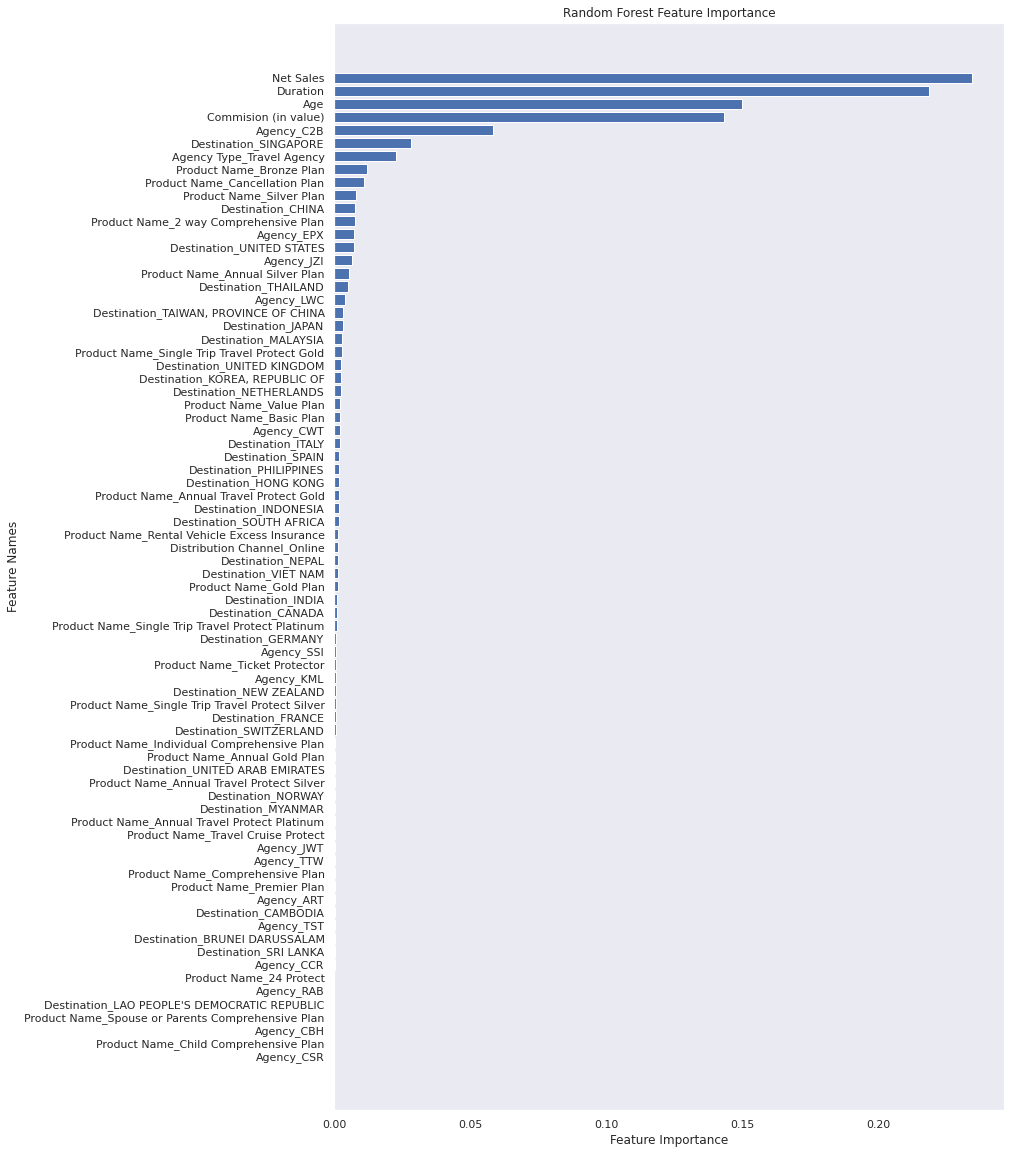

In [73]:
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(12,20))
plt.barh(X.columns[sorted_idx] , feature_importance[sorted_idx])
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.show()

In [75]:
X.columns

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Agency_ART',
       'Agency_C2B', 'Agency_CBH', 'Agency_CCR', 'Agency_CSR', 'Agency_CWT',
       'Agency_EPX', 'Agency_JWT', 'Agency_JZI', 'Agency_KML', 'Agency_LWC',
       'Agency_RAB', 'Agency_SSI', 'Agency_TST', 'Agency_TTW',
       'Agency Type_Travel Agency', 'Distribution Channel_Online',
       'Product Name_2 way Comprehensive Plan', 'Product Name_24 Protect',
       'Product Name_Annual Gold Plan', 'Product Name_Annual Silver Plan',
       'Product Name_Annual Travel Protect Gold',
       'Product Name_Annual Travel Protect Platinum',
       'Product Name_Annual Travel Protect Silver', 'Product Name_Basic Plan',
       'Product Name_Bronze Plan', 'Product Name_Cancellation Plan',
       'Product Name_Child Comprehensive Plan',
       'Product Name_Comprehensive Plan', 'Product Name_Gold Plan',
       'Product Name_Individual Comprehensive Plan',
       'Product Name_Premier Plan',
       'Product Name_Rental Vehi

In [76]:
%%time
# first run entropy
parameter_grid = {"n_estimators":[100],
                    "max_depth":[3,None],
                    "max_features":[1,3,10],
                    "min_samples_split":[2,3,10],
                    "min_samples_leaf": [1,3,10],
                    "bootstrap":[True, False],
                    "criterion":['entropy']}
best_params_en , best_score_en , feature_importance_en = fit_random_forest(X_train_scaled , y_train , X_val_scaled, y_val, parameter_grid)

Accuracy of model is : 0.9362330249950797
best parameter set is:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
best score is:  0.9336707437087023
CPU times: user 16min 12s, sys: 2.24 s, total: 16min 14s
Wall time: 16min 21s


In [78]:
# Second Run gini
%%time
parameter_grid = {"n_estimators":[100],
                    "max_depth":[6,None],
                    "max_features":[8,10, 14],
                    "min_samples_split":[2,4,6],
                    "min_samples_leaf": [1,4,6],
                    "bootstrap":[True],
                    "criterion":['gini']}
                    #"warm_start":[True, False]}

best_params , best_score, feature_importance = fit_random_forest(X_train_scaled , y_train , X_val_scaled, y_val, parameter_grid)

Accuracy of model is : 0.935183362855081
best parameter set is:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 14, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
best score is:  0.9336707437087025
CPU times: user 9min 53s, sys: 1.3 s, total: 9min 55s
Wall time: 10min 14s


## function to fit the best model and make the predictions

In [64]:
import pickle

In [65]:
X_train.shape

(35565, 76)

In [66]:
imp_features = ['Net Sales', 'Duration','Age','Commision (in value)','Agency_C2B','Destination_SINGAPORE','Agency Type_Travel Agency',
                'Product Name_Bronze Plan','Product Name_Cancellation Plan','Product Name_Silver Plan','Destination_CHINA','Product Name_2 way Comprehensive Plan',
                'Agency_EPX','Destination_UNITED STATES','Agency_JZI','Product Name_Annual Silver Plan','Destination_THAILAND','Agency_LWC',
                'Destination_TAIWAN, PROVINCE OF CHINA','Destination_JAPAN','Destination_MALAYSIA','Product Name_Single Trip Travel Protect Gold',
                'Destination_UNITED KINGDOM','Destination_KOREA, REPUBLIC OF','Destination_NETHERLANDS','Product Name_Value Plan',
                'Product Name_Basic Plan','Agency_CWT','Destination_ITALY','Destination_SPAIN','Destination_PHILIPPINES','Destination_HONG KONG',
                'Product Name_Annual Travel Protect Gold','Destination_INDONESIA','Destination_SOUTH AFRICA','Product Name_Rental Vehicle Excess Insurance',
                'Distribution Channel_Online','Destination_NEPAL','Destination_VIET NAM','Product Name_Gold Plan','Destination_INDIA']

In [67]:
X_train_2 = X_train[imp_features]
X_train_2.shape

(35565, 41)

In [68]:
X_val_2 = X_val[imp_features]
X_val_2.to_csv('out.csv',index=False)
X_val_2.shape

(15243, 41)

In [69]:
X_train_2.head()

,Net Sales,Duration,Age,Commision (in value),Agency_C2B,Destination_SINGAPORE,Agency Type_Travel Agency,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Silver Plan,Destination_CHINA,Product Name_2 way Comprehensive Plan,Agency_EPX,Destination_UNITED STATES,Agency_JZI,Product Name_Annual Silver Plan,Destination_THAILAND,Agency_LWC,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_JAPAN,Destination_MALAYSIA,Product Name_Single Trip Travel Protect Gold,Destination_UNITED KINGDOM,"Destination_KOREA, REPUBLIC OF",Destination_NETHERLANDS,Product Name_Value Plan,Product Name_Basic Plan,Agency_CWT,Destination_ITALY,Destination_SPAIN,Destination_PHILIPPINES,Destination_HONG KONG,Product Name_Annual Travel Protect Gold,Destination_INDONESIA,Destination_SOUTH AFRICA,Product Name_Rental Vehicle Excess Insurance,Distribution Channel_Online,Destination_NEPAL,Destination_VIET NAM,Product Name_Gold Plan,Destination_INDIA
2169,21.0,46,36,0.00,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21964,20.0,19,35,0.00,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
43646,0.0,9,58,41.58,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
12660,13.5,6,54,3.38,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
13896,20.0,31,40,0.00,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [70]:
# making a Random Forest function to fit and predict the model to data
def fit_predict(x_train, y_train , x_test):

  rf_model = RandomForestClassifier(bootstrap= True, criterion= 'gini', 
                    max_depth= None, max_features=10, min_samples_leaf= 1, min_samples_split= 2,
                    n_estimators= 100,random_state = 0 , class_weight={0:1,1:10})

# {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
  rf_model.fit(x_train, y_train)

# save the model using pickle
  save_model = pickle.dump(rf_model, open('rf_model', 'wb'))

  rf_from_pickle = pickle.load(open('rf_model', 'rb'))

  y_pred = rf_from_pickle.predict(x_test)

  y_pred_proba = rf_from_pickle.predict_proba(x_test)[:,1]

  return y_pred , y_pred_proba , rf_model.classes_, rf_model

In [71]:
y_pred, y_pred_proba, classes_, rf_model = fit_predict(X_train_2, y_train, X_val_2)

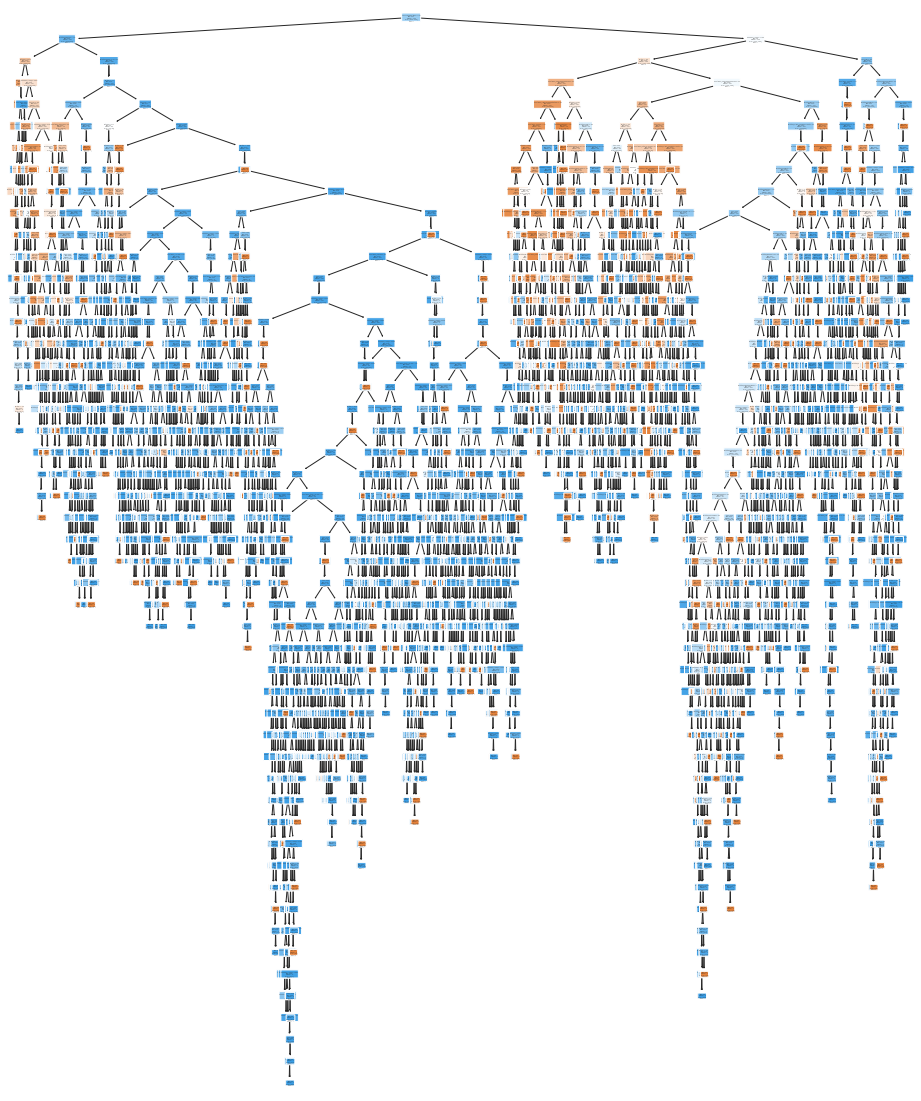

In [74]:
# visualizing a tree in random forest classifier
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(16,20))

plot_tree(rf_model.estimators_[0],
          feature_names = X_train_2.columns,
          class_names = 'Claim',
          filled=True , impurity = True, rounded = True)

fig.savefig('rf_graphviz_viz.png')
plt.show()

## Evaluate the model

In [75]:
def evaluation(y_pred, y_val):
  class_report = classification_report (y_val, y_pred)
  conf_matrix = confusion_matrix(y_val, y_pred)
  roc_score = roc_auc_score(y_val, y_pred)
  p_score = precision_score(y_val, y_pred)
  return class_report, conf_matrix , roc_score, p_score

In [76]:
class_report , conf_matrix, roc_score, p_score = evaluation(y_pred, y_val)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     12633
           1       0.84      0.79      0.81      2610

    accuracy                           0.94     15243
   macro avg       0.90      0.88      0.89     15243
weighted avg       0.94      0.94      0.94     15243



In [77]:
conf_matrix

array([[12224,   409],
       [  539,  2071]])

<Figure size 864x432 with 0 Axes>

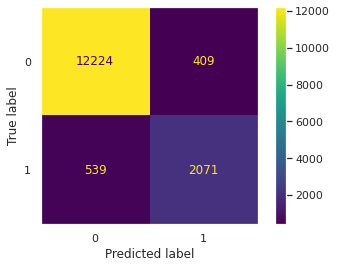

In [78]:
plt.figure(figsize=(12,6))
plot_confusion_matrix(rf_model , X_val_2 , y_val)
plt.show()

### evaluation

In [84]:
accuracy = accuracy_score(y_val,y_pred)
accuracy

0.9378075182050778

In [82]:
precision = precision_score(y_val,y_pred)
precision

0.7934865900383141

In [83]:
recall = recall_score(y_val,y_pred)
recall

0.8350806451612903

In [85]:
f_score = f1_score(y_val, y_pred)
f_score

0.8137524557956777

In [91]:
score_final = {"Model": "Random Forest Classifier(Gini)", "Accuracy":[accuracy], "Precision": [precision], "Recall": [recall], "F1 Score": [f_score]}
final_score_df = pd.DataFrame.from_dict(score_final)
final_score_df 

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier(Gini),0.937808,0.793487,0.835081,0.813752


In [89]:
score_final

{'Accuracy': 0.9378075182050778,
 'F1 Score': 0.8137524557956777,
 'Model': 'Random Forest Classifier(Gini)',
 'Precision': 0.7934865900383141,
 'Recall': 0.8350806451612903}

In [80]:
out = {"Predicted Values": y_pred, "True Value": y_val}
Output = pd.DataFrame(data = out)
Output.head(10)

,Predicted Values,True Value
45930,0,1
11265,0,0
21635,0,0
40336,0,0
30404,0,0
25145,1,1
45482,0,0
33622,0,0
35944,0,0
42207,0,0


## Function to Plot the roc curve for the classifier

In [81]:
#plotting the roc auc curve for it
def plot_roc_curve(y_val, y_pred_proba):
  fpr, tpr , _ = roc_curve(y_val, y_pred_proba)
  roc_auc = roc_auc_score(y_val, y_pred_proba)
  plt.plot(fpr, tpr, label = 'Random Forest, auc' + str(roc_auc))

  plt.title("Receiver Operating Characterstics")
  plt.legend(loc='Lower Right')
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([0,1])
  plt.ylim([0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

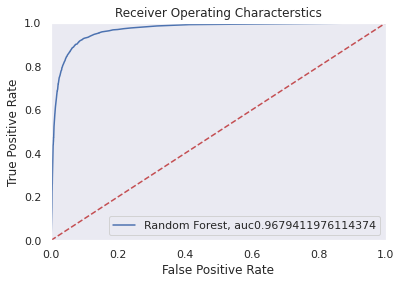

In [82]:
plot_roc_curve(y_val, y_pred_proba)
# higher is the AUC better is the classifier

## The evaluation metric to be used is Precision Score as Precision is intuitively the ability of the classifier not to label as positive a sample that is negative. 
## In our case of Claims , in case the Claim is not approved and its genuine, the customer can re-apply with supporting documents and can get the claim approved.
## But if any non-genuine claim is approved , then it amounts to loss of revenue to the company and it would be pretty difficult for the company to recover the money back.